# Introducción sobre el estudio estadístico

La relación entre el estilo de vida y el desempeño académico ha sido objeto de interés en los campos de la educación, la psicología y la salud desde hace décadas. Estudios pioneros en las décadas de 1970 y 1980 comenzaron a explorar cómo factores como las horas de estudio, el sueño y la participación en actividades extracurriculares afectan los logros académicos. Sin embargo, la creciente complejidad de las rutinas estudiantiles en el siglo XXI, marcada por demandas académicas más intensas, la influencia de la tecnología y la necesidad de equilibrar múltiples responsabilidades, ha renovado la importancia de investigar estas relaciones desde una perspectiva integral.

## El desafío moderno: un equilibrio cada vez más complejo

En la era digital, los patrones de estilo de vida estudiantil se han transformado profundamente. El acceso constante a dispositivos electrónicos, las redes sociales y las presiones sociales han incrementado los factores que compiten por la atención de los estudiantes. Esto plantea preguntas fundamentales sobre cómo los estudiantes actuales organizan su tiempo y cuáles de estas actividades tienen el impacto más significativo en su rendimiento académico. Además, con el aumento de problemas como la ansiedad y la depresión en estudiantes universitarios, comprender cómo los hábitos diarios afectan el bienestar es más relevante que nunca.

## El objetivo del presente estudio

Este estudio tiene como objetivo principal analizar los patrones de estilo de vida de los estudiantes y su relación con el desempeño académico, representado por su GPA (promedio de calificaciones). Al contar con registros detallados de las actividades diarias de los estudiantes se busca:

Identificar los factores clave que generan estrés en los estudiantes. Determinar cómo el estrés, derivado de la combinación de horas de estudio y sueño, influye en el desempeño. Explorar las interacciones entre actividades físicas, sociales y académicas, y su impacto en el bienestar general.

### Acerca del Conjunto de Datos

Este conjunto de datos contiene datos de $2000$ estudiantes recopilados a través de una encuesta en Google Form. Incluye información sobre horas de estudio, actividades extracurriculares, sueño, socialización, actividad física, niveles de estrés y promedio de notas. Los datos cubren un año académico desde agosto de 2023 hasta mayo de 2024 y reflejan los estilos de vida de los estudiantes principalmente de la India.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt # creating visualizations
import scipy # advanced scientific calculations

from statsmodels.stats.weightstats import ztest
import scipy.stats as st
from scipy.stats import norm, lognorm, gamma, expon, chi2

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, classification_report

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./student_lifestyle_dataset.csv
./statistics-project-student-lifestyle.ipynb:Zone.Identifier
./statistics-project-student-lifestyle.ipynb


In [4]:
df = pd.read_csv('student_lifestyle_dataset.csv')

In [5]:
df.head()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.88     Moderate  
4  3.51         High

In [6]:
df.describe()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.000000   
mean   1000.500000             7.475800                       1.990100   
std     577.494589             1.423888                       1.155855   
min       1.000000             5.000000                       0.000000   
25%     500.750000             6.300000                       1.000000   
50%    1000.500000             7.400000                       2.000000   
75%    1500.250000             8.700000                       3.000000   
max    2000.000000            10.000000                       4.000000   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count          2000.000000           2000.000000   
mean              7.501250              2.704550   
std               1.460949              1.688514   
min               5.000000              0.000000   
25%               6.200000              1.200000   
50%               7.500000              2.600000   
75%               8.800000              4.100000   
max              10.000000              6.000000   

       Physical_Activity_Hours_Per_Day          GPA  
count                       2000.00000  2000.000000  
mean                           4.32830     3.115960  
std                            2.51411     0.298674  
min                            0.00000     2.240000  
25%                            2.40000     2.900000  
50%                            4.10000     3.110000  
75%                            6.10000     3.330000  
max                           13.00000     4.000000

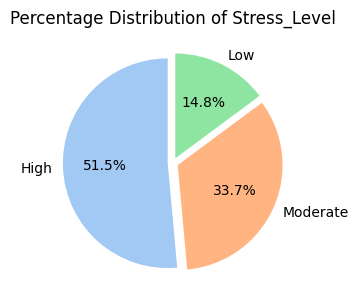

In [7]:
plt.subplot(1, 2, 2)
df['Stress_Level'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90, explode=[0.05] * df['Stress_Level'].nunique())
plt.title(f'Percentage Distribution of Stress_Level')
plt.ylabel('')  

plt.tight_layout()
plt.show()

### Observaciones

1. El nivel de estrés más frecuente es *Alto*, con un $51.5\%$ de los estudiantes. Esto indica que más de la mitad de los estudiantes experimentan niveles altos de estrés, que pueden deberse a factores académicos, sociales o de estilo de vida.
2. El estrés *Moderado* es la segunda categoría más común, con un $33.7\%$ de los estudiantes. Esto refleja una parte significativa de los estudiantes que gestionan su estrés razonablemente bien.
3. Una proporción menor, el $14.8\%$, experimenta estrés *Bajo*. Esto indica que solo una minoría de los estudiantes tiene un estilo de vida equilibrado y libre de estrés.

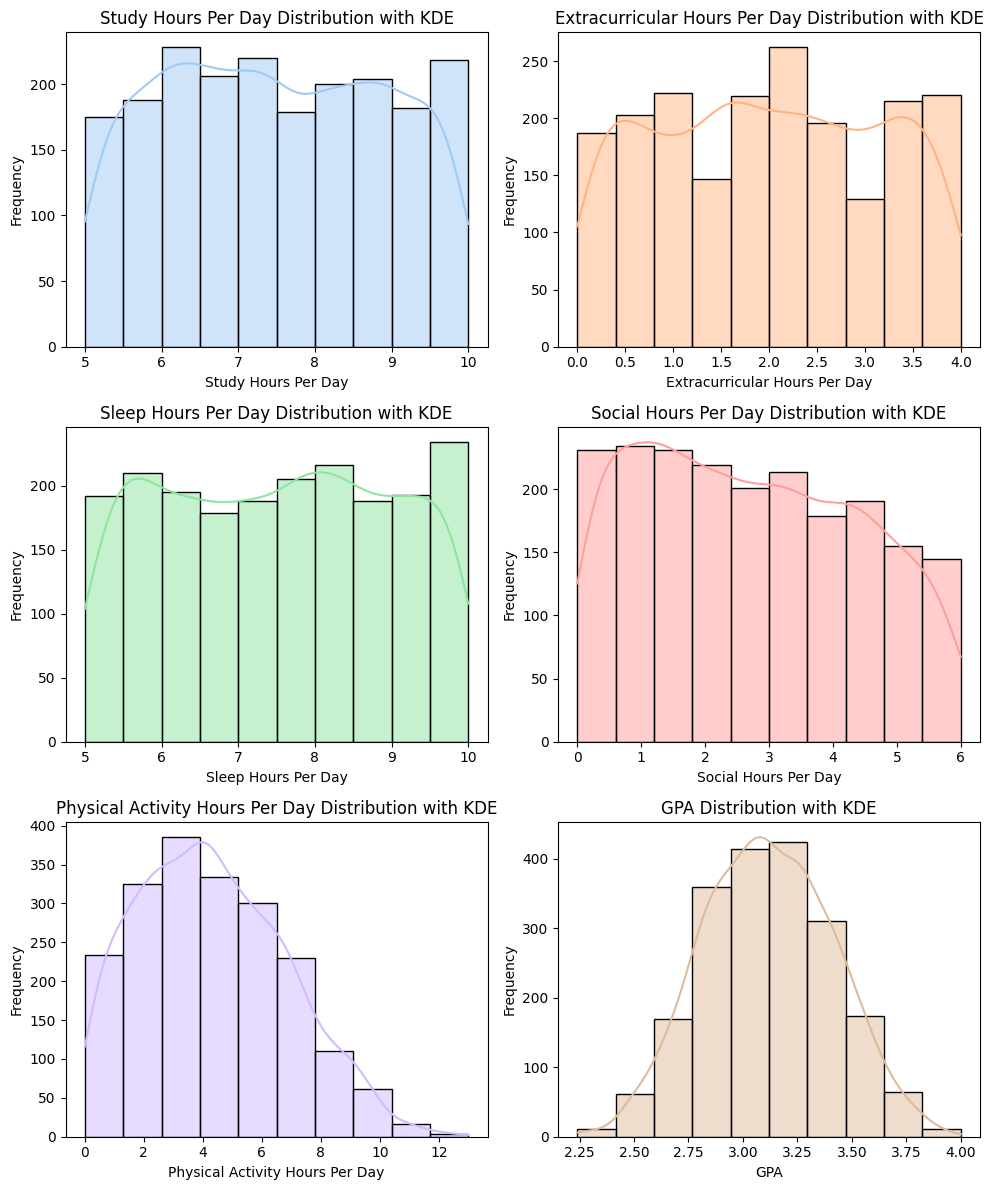

In [8]:
def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))  
    
    muted_colors = sns.color_palette("pastel", len(columns))
    
    for i, column in enumerate(columns):
        plt.subplot(3, 2, i + 1)  
        sns.histplot(data[column], kde=True, bins=10, color=muted_colors[i])
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 
                       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 
                       'Physical_Activity_Hours_Per_Day', 'GPA']

univariate_analysis(df, columns_to_analyze)

### Observaciones

1. **Study Hours Per Day:**
    * La distribución está ligeramente sesgada hacia la derecha: **la mayoría de los estudiantes estudian entre $6$ y $8$ horas.**
3. **Extracurricular Hours Per Day:**
    * Una distribución sesgada hacia la izquierda muestra que **la mayoría de los estudiantes pasan entre $0$ y $2$ horas diarias** en actividades extracurriculares.
5. **Sleep Hours Per Day:**
    * La distribución es casi normal, **centrada alrededor de $7$-$8$ horas por día**.
7. **Social Hours Per Day:**
    * La distribución está sesgada hacia la derecha: **la mayoría pasa entre $1$ y $3$ horas al día** socializando.
9. **Physical Activity Hours Per Day:**
    * Una distribución sesgada hacia la derecha muestra que la mayoría de los estudiantes **realizan entre $2$ y $5$ horas** de actividad física diariamente.
11. **GPA:**
    * El GPA sigue una distribución bastante normal, alcanzando un máximo entre $3.0$ y $3.2$.


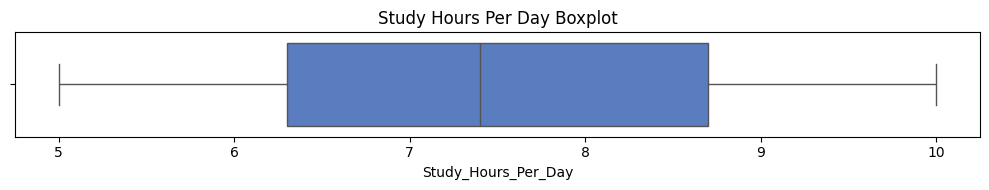


Summary Statistics for Study Hours Per Day:
 count    2000.000000
mean        7.475800
std         1.423888
min         5.000000
25%         6.300000
50%         7.400000
75%         8.700000
max        10.000000
Name: Study_Hours_Per_Day, dtype: float64


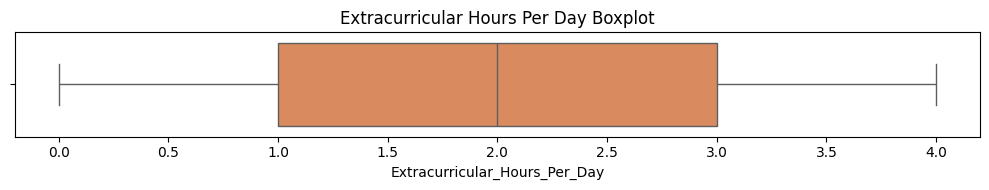


Summary Statistics for Extracurricular Hours Per Day:
 count    2000.000000
mean        1.990100
std         1.155855
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Extracurricular_Hours_Per_Day, dtype: float64


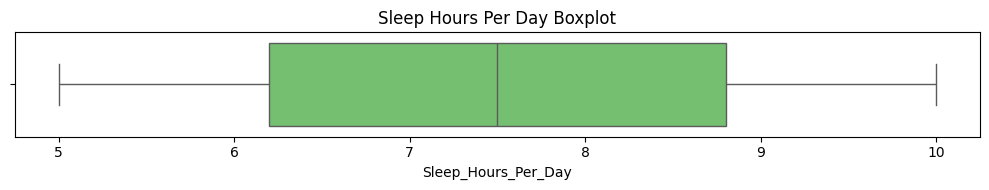


Summary Statistics for Sleep Hours Per Day:
 count    2000.000000
mean        7.501250
std         1.460949
min         5.000000
25%         6.200000
50%         7.500000
75%         8.800000
max        10.000000
Name: Sleep_Hours_Per_Day, dtype: float64


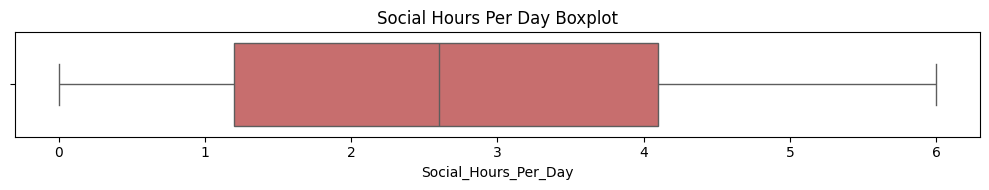


Summary Statistics for Social Hours Per Day:
 count    2000.000000
mean        2.704550
std         1.688514
min         0.000000
25%         1.200000
50%         2.600000
75%         4.100000
max         6.000000
Name: Social_Hours_Per_Day, dtype: float64


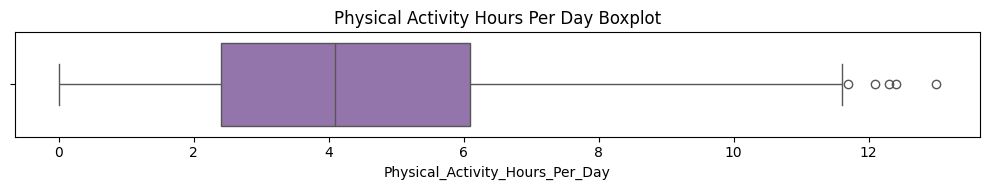


Summary Statistics for Physical Activity Hours Per Day:
 count    2000.00000
mean        4.32830
std         2.51411
min         0.00000
25%         2.40000
50%         4.10000
75%         6.10000
max        13.00000
Name: Physical_Activity_Hours_Per_Day, dtype: float64


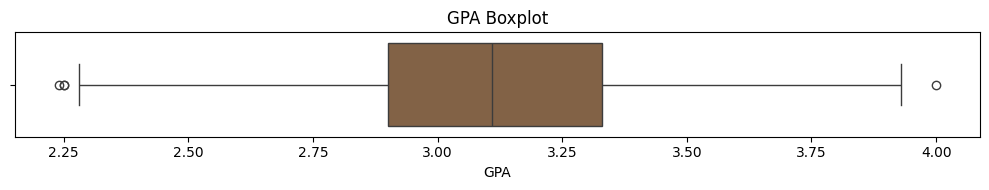


Summary Statistics for GPA:
 count    2000.000000
mean        3.115960
std         0.298674
min         2.240000
25%         2.900000
50%         3.110000
75%         3.330000
max         4.000000
Name: GPA, dtype: float64


In [9]:
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    color = sns.color_palette("muted")[columns_to_analyze.index(column)]
    
    sns.boxplot(x=data[column], color=color)
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 
                       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 
                       'Physical_Activity_Hours_Per_Day', 'GPA']

for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

### Observaciones

1. **Study Hours Per Day**
- **Rango**: estudian de $5$ a $10$ horas.
- **Mediana**:  $7.4$ horas, cerca de la media de $7,48$ horas.
- Los valores atípicos son mínimos, lo que indica que la mayoría de los estudiantes siguen un horario de estudio consistente.
2. **Extracurricular Hours Per Day**
- **Rango**: estudian de $0$ a $4$ horas.
- **Mediana**:  $2$ horas, que coincide con la media de $1.99$ horas.
- Los valores atípicos son poco frecuentes y la mayoría de los estudiantes participan en actividades extracurriculares moderadas.
3. **Sleep Hours Per Day**
- **Rango**: estudian de $5$ a $10$ horas.
- **Mediana**:  $7.5$ horas, igual a la media de $7.50$ horas.
- Los valores atípicos son mínimos, lo que sugiere patrones de sueño consistentes entre los estudiantes.
4. **Social Hours Per Day**
- **Rango**: estudian de $0$ a $6$ horas.
- **Mediana**:  $2.6$ horas, ligeramente por debajo de la media de $2.70$ horas.
- Existen valores atípicos en los extremos inferior y superior, lo que indica diversos hábitos sociales.
5. **Physical Activity Hours Per Day**
- **Rango**: estudian de $0$ a $13$ horas.
- **Mediana**:  $4.1$ horas, cerca de la media de $4.33$ horas.
- Los valores atípicos son notables, ya que algunos estudiantes informan niveles de actividad inusualmente altos.
6. **GPA**
- **Rango**: estudian de $2.24$ a $4.0$.
- **Mediana**:  $3.11$, cerca de la media de $3.12$.
- Los valores atípicos son poco frecuentes, lo que indica que la mayoría de los estudiantes tienen un rendimiento académico moderado a alto.

**Otras observaciones**:
- Patrones consistentes: características como las horas de estudio, las horas de sueño y el promedio de calificaciones muestran valores atípicos limitados, lo que sugiere uniformidad en estos comportamientos.
- Participación variada: las horas de actividad social y física muestran una mayor variabilidad y valores atípicos, lo que destaca diferentes opciones de estilo de vida entre los estudiantes.


## Visualizar la relación entre Study Hours y GPA

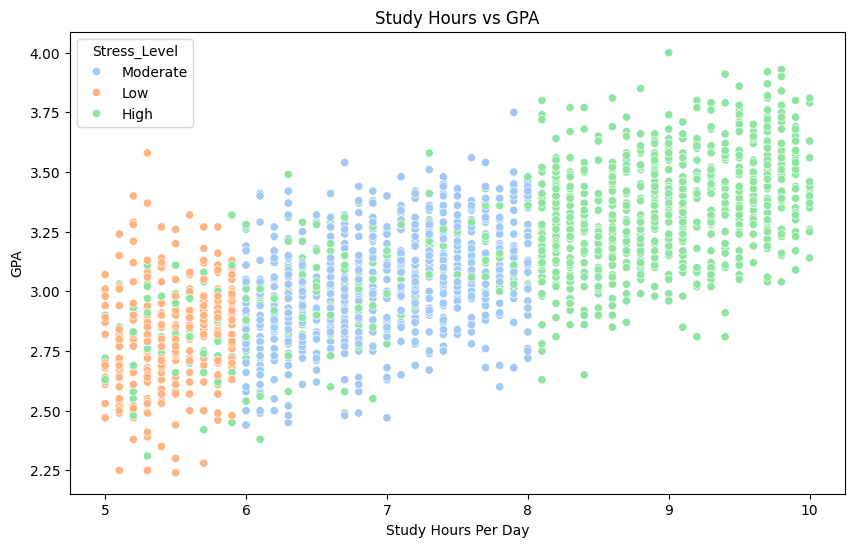

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours_Per_Day', y='GPA', data=df, hue='Stress_Level', palette='pastel')
plt.title('Study Hours vs GPA')
plt.xlabel('Study Hours Per Day')
plt.ylabel('GPA')
plt.show()

## Encontrar una distribución que ajuste con la variable estudiada

Intentar ajustar a varias distribuciones, para escoger la distribución que para seguir la variable estudiada (en este caso GPA). Se puede observar que la variable estudiada parece seguir una distribución normal.

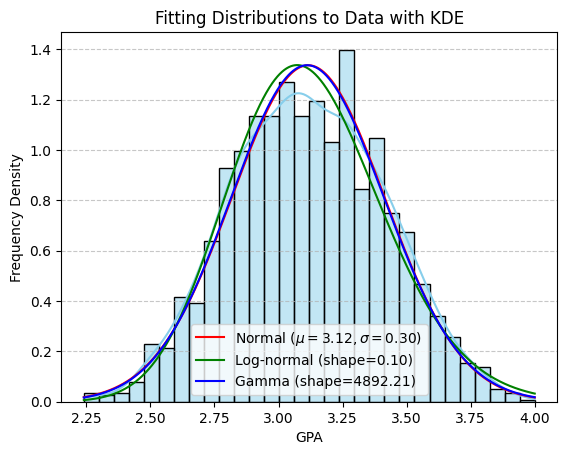

In [11]:
data = df['GPA']

sns.histplot(data, bins=30, kde=True, color='skyblue', stat='density')

# Testing various distributions
x = np.linspace(data.min(), data.max(), 1000)

# Fit Normal
mu, sigma = norm.fit(data)
pdf_norm = norm.pdf(x, mu, sigma)
plt.plot(x, pdf_norm, 'r-', label=f'Normal ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')

# Fit Log-normal
shape, loc, scale = lognorm.fit(data, floc=0)
pdf_lognorm = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf_lognorm, 'g-', label=f'Log-normal (shape={shape:.2f})')

# Fit Gamma
shape, loc, scale = gamma.fit(data)
pdf_gamma = gamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf_gamma, 'b-', label=f'Gamma (shape={shape:.2f})')

plt.title('Fitting Distributions to Data with KDE')
plt.xlabel('GPA')
plt.ylabel('Frequency Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Prueba de Kolmogorov-Smirnov

Para asegurar que la variable puede seguir una distribución normal se realizará una **[Prueba de Kolmogorov-Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)**.

In [12]:
from scipy.stats import kstest

# Perform the KS test with the fitted normal distribution
ks_stat, p_value = kstest(data, 'norm', args=(mu, sigma))

print(f"KS statistic: {ks_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print('The null hypothesis is not rejected: the data may be normal.')
else:
    print('The null hypothesis is rejected: the data do not follow a normal distribution.')

KS statistic: 0.0258
p-value: 0.1376
The null hypothesis is not rejected: the data may be normal.


## Construir un intervalo de confianza del $90\%$ para los parámetros de la distribución.

### Intervalo de confianza para $\mu$

$$\mu \in [ \hat{X} - Z_{1 - \frac{\alpha}{2}} \frac{S
}{\sqrt{n}} ; \hat{X} + Z_{1 - \frac{\alpha}{2}} \frac{S}{\sqrt{n}} ]$$

In [13]:
alpha = 0.1
Z = norm.ppf(1 - alpha / 2)

N = len(data)
S = data.std()
X = data.mean()
SE = S / np.sqrt(N)

# Calculate limits
lower_bound = X - Z * SE
upper_bound = X + Z * SE

print('Confidence interval for mu:', f"[{lower_bound}, {upper_bound}]")

Confidence interval for mu: [3.1049747738228093, 3.1269452261771904]


### Intervalo de confianza para $\sigma^2$

$$\sigma^2 \in [\frac{(n-1)S^2}{\chi^2_{1 - \frac{\alpha}{2}}(n-1)}, \frac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2}}(n-1)}]$$

In [14]:
N = len(data)
S_squared = data.var(ddof=1)

chi2_lower = chi2.ppf(1 - alpha / 2, df=N-1)
chi2_upper = chi2.ppf(alpha / 2, df=N-1)

lower_bound = (N - 1) * S_squared / chi2_upper
upper_bound = (N - 1) * S_squared / chi2_lower

print('Confidence interval for chi:', f"[{lower_bound}, {upper_bound}]")

Confidence interval for chi: [0.09404475385169156, 0.08474890213677717]


## Prueba de hipótesis

En este punto, es válido preguntarse si se puede afirmar que la media del GPA de los estudiantes excede $3.0$. Se utilizará un nivel de confianza del $95\%$.

Para afirmar si la media del GPA de los estudiantes excede $3.0$, podemos realizar una **prueba de hipótesis** para la media. Las hipótesis serán: $$H_0: \mu \le 3, \,\,\, H_1: \mu > 3$$
Como se desconoce la desviación poblacional, se utilizará la prueba de $\mu$ con varianza desconocida. Para ello se calculará el estadígrafo $t$:

$$t = \frac{\hat{X} - \mu_0}{S}\sqrt n$$

Como tenemos una muestra de tamaño $n > 30$ se puede usar para esta prueba una modificación en la Región Crítica cambiando el percentil de la t-Student por el percentil de la normal. $$RC = (Z_{1-\alpha}, \infty)$$

In [15]:
alpha = 0.05
Z = norm.ppf(1 - alpha)
mu_0 = 3

N = len(data)
S = data.std()
X = data.mean()
z = (X - mu_0) / S * np.sqrt(N)

if z > Z:
    print("We reject the null hypothesis: The mean GPA exceeds 3.")
else:
    print("We don't reject the null hypothesis: There is insufficient evidence to claim that the mean GPA exceeds 3.")

We reject the null hypothesis: The mean GPA exceeds 3.


## Análisis de correlación entre las variables

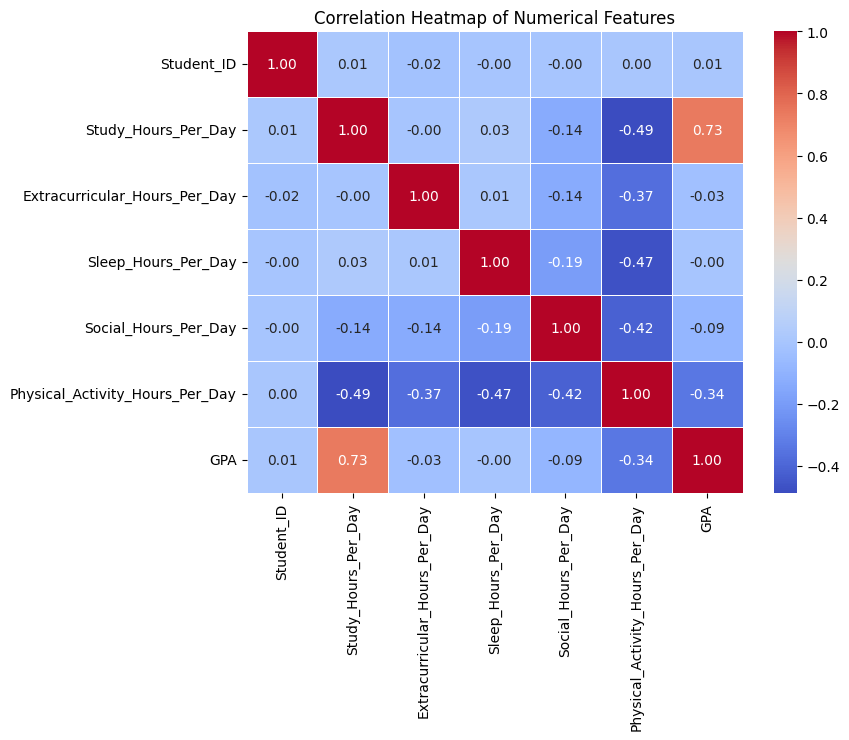

In [16]:
plt.figure(figsize=(8, 6))
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Observaciones

1. **Study Hours & GPA**
- Fuerte correlación positiva ($0.73$).
- Indica que los estudiantes que estudian más tienden a lograr promedios más altos, lo que resalta la importancia del tiempo de estudio en el rendimiento académico.
2. **Physical Activity & Study Hours**
- Correlación negativa moderada ($-0.49$).
- Sugiere que los estudiantes que dedican más tiempo a actividades físicas tienden a estudiar menos, posiblemente debido a limitaciones de tiempo.
3. **Physical Activity & GPA**
- Correlación negativa moderada ($-0.34$).
- Indica que un mayor número de horas de actividad física podría estar relacionado con un promedio de calificaciones ligeramente inferior, posiblemente debido a un menor tiempo de estudio.
4. **Social Hours & GPA**
- Correlación negativa baja ($-0.09$).
- Sugiere un impacto mínimo de la socialización en el rendimiento académico, aunque el exceso de horas sociales podría afectar levemente el rendimiento académicos.
5. **Extracurricular Hours & GPA**
- Prácticamente no existe correlación ($-0.03$).
- Las actividades extracurriculares parecen tener una influencia directa insignificante en el rendimiento académico.
6. **Sleep Hours & GPA**
- No hay correlación significativa ($0.00$).
- Esto sugiere que la duración del sueño no afecta directamente el promedio de calificaciones, pero sus efectos indirectos (por ejemplo, una mejor concentración) pueden ser importantes.

## Análisis de datos sobre Stress Level vs. GPA en dos poblaciones

A continuación se realizará un análisis (comparación) de dos poblaciones, los estudiantes que tienen un nivel de estrés *Bajo* o *Moderado*, y los que tienen un nivel de estrés *Alto* para comparar sus resultados.

In [17]:
low_moderate = df[df['Stress_Level'].apply(lambda x: 'Low' in x or 'Moderate' in x)]['GPA']
high = df[df['Stress_Level'].apply(lambda x: 'High' in x)]['GPA']

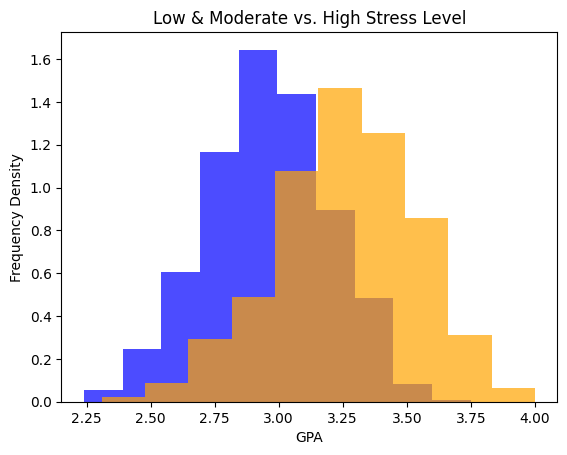

In [18]:
plt.hist(low_moderate, color='blue', alpha=0.7, density=True)
plt.hist(high, color='orange', alpha=0.7, density=True)
plt.title('Low & Moderate vs. High Stress Level')
plt.xlabel('GPA')
plt.ylabel('Frequency Density')
plt.show()

Aquí se puede observar que los estudiantes que tienen un nivel de estrés *Alto* tienden a tener un GPA más alto. A continuación, se realizará una prueba de hipótesis de estas dos poblaciones para justificar la respuesta.

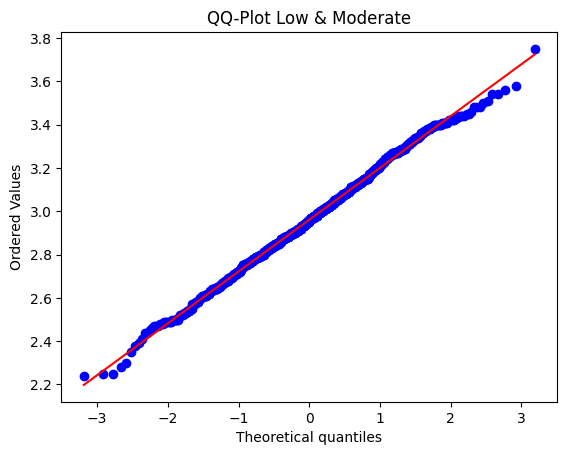

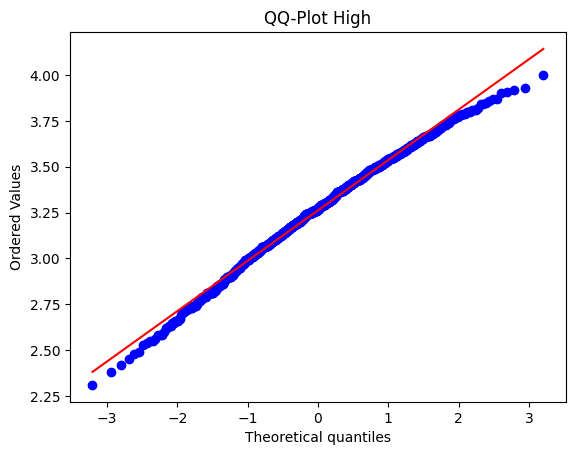

In [19]:
st.probplot(low_moderate, dist="norm", plot=plt)
plt.title("QQ-Plot Low & Moderate")
plt.show()

st.probplot(high,dist="norm", plot=plt)
plt.title("QQ-Plot High")
plt.show()

In [20]:
from scipy.stats import kstest

# Perform the KS test with the fitted normal distribution
ks_stat, p_value = kstest(low_moderate, 'norm', args=(low_moderate.mean(), low_moderate.std()))

print(f"KS statistic: {ks_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print('The null hypothesis is not rejected: the data may be normal.')
else:
    print('The null hypothesis is rejected: the data do not follow a normal distribution.')

KS statistic: 0.0237
p-value: 0.6392
The null hypothesis is not rejected: the data may be normal.


In [21]:
from scipy.stats import kstest

# Perform the KS test with the fitted normal distribution
ks_stat, p_value = kstest(high, 'norm', args=(high.mean(), high.std()))

print(f"KS statistic: {ks_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print('The null hypothesis is not rejected: the data may be normal.')
else:
    print('The null hypothesis is rejected: the data do not follow a normal distribution.')

KS statistic: 0.0357
p-value: 0.1418
The null hypothesis is not rejected: the data may be normal.


Realizando el KSTest se puede afirmar que los datos extraídos para ambas poblaciones pueden seguir una distribución normal.

In [22]:
lev_stat, p_value = st.levene(low_moderate, high)

print(f"Levene statistic: {lev_stat:.4f}")
print(f"p-value: {p_value:.4f}")

equal_var = p_value > 0.05

Levene statistic: 14.8018
p-value: 0.0001


In [23]:
t_stat, p_value = st.ttest_ind(low_moderate, high, equal_var=equal_var)

print(f"T statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("We reject the null hypothesis: The students with 'High Stress Level' have a higher GPA than those with 'Low or Moderate Stress Level'.")
else:
    print("We don't reject the null hypothesis: There is insufficient evidence to claim that the students with High Stress Level have a higher GPA than those with Low or Moderate Stress Level.")

T statistic: -26.1461
p-value: 0.0000
We reject the null hypothesis: The students with 'High Stress Level' have a higher GPA than those with 'Low or Moderate Stress Level'.


Con lo mostrado anteriormente se puede afirmar la hipótesis de que los estudiantes que tienen un nivel de estrés *Alto* tienden a tener un GPA más alto.

In [24]:
gpa_low = df[df['Stress_Level'].apply(lambda x: 'Low' in x)]['GPA']
gpa_moderate = df[df['Stress_Level'].apply(lambda x: 'Moderate' in x)]['GPA']
gpa_high = df[df['Stress_Level'].apply(lambda x: 'High' in x)]['GPA']

f_stat, p_value = st.f_oneway(gpa_low, gpa_moderate, gpa_high)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("We reject the null hypothesis: There are significant differences in GPA depending on the level of stress.")
else:
    print("The null hypothesis is not rejected: There is insufficient evidence to claim that GPA differs according to the level of stress.")


F-statistic: 434.8882
p-value: 0.0000
We reject the null hypothesis: There are significant differences in GPA depending on the level of stress.


## Análisis de correlación entre GPA con las demás variables separando por nivel de estrés

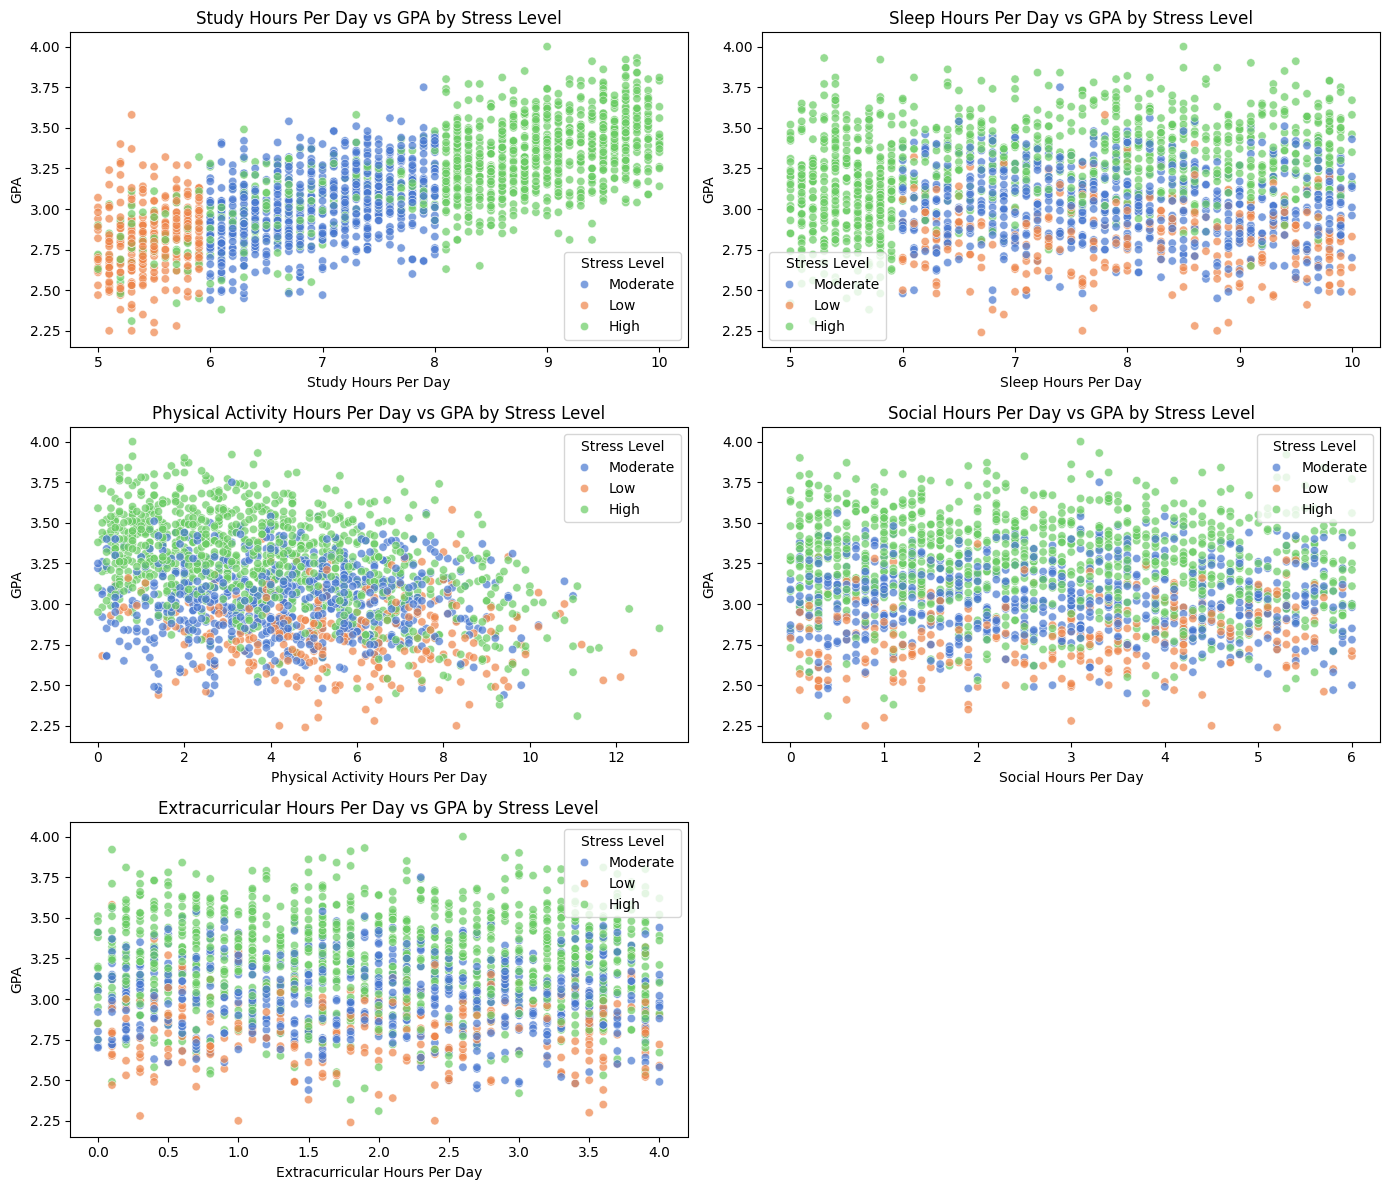

In [25]:
plt.figure(figsize=(14, 12))

numerical_features = [
    'Study_Hours_Per_Day', 
    'Sleep_Hours_Per_Day', 
    'Physical_Activity_Hours_Per_Day', 
    'Social_Hours_Per_Day', 
    'Extracurricular_Hours_Per_Day'
]

# Plot each feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(
        x=feature, 
        y='GPA', 
        hue='Stress_Level', 
        data=df, 
        palette='muted', 
        alpha=0.7
    )
    plt.title(f'{feature.replace("_", " ")} vs GPA by Stress Level')
    plt.xlabel(feature.replace('_', ' '))
    plt.ylabel('GPA')
    plt.legend(title='Stress Level')

plt.tight_layout()
plt.show()

### Observaciones

1. **Study Hours Per Day vs. GPA by Stress Level**
- **Estrés alto**
    - Los estudiantes con muchas horas de estudio y altos niveles de estrés tienden a lograr promedios más altos.
- **Estrés moderado**
    - Los estudiantes con niveles de estrés moderados y horas de estudio razonables muestran un amplio rango de GPA, lo que sugiere que el equilibrio es crucial.
- **Estrés bajo**
    - Los estudiantes con menor estrés tienden a tener promedios de calificaciones moderados, independientemente de las horas de estudio.
2. **Sleep Hours Per Day vs. GPA by Stress Level**
- En todos los niveles de estrés, no existe una tendencia clara entre las horas de sueño y el promedio de calificaciones.
- Los estudiantes con promedios de calificaciones altos se distribuyen de manera uniforme entre distintas duraciones de sueño, independientemente de sus niveles de estrés.
3. **Physical Activity Hours Per Day vs. GPA by Stress Level**
- **Estrés alto**
    - Los estudiantes con mucho estrés tienden a realizar menos actividad física y quienes la realizan tienen promedios de calificaciones variables.
- **Estrés moderado**
    - Se observa una amplia gama de promedios de calificaciones, con niveles de actividad moderados asociados con promedios de calificaciones decentes.
- **Estrés bajo**
    - Los estudiantes con mayores horas de actividad física muestran un amplio rango de GPA, lo que indica que la actividad podría no influir directamente en el GPA de este grupo.
4. **Social Hours Per Day vs. GPA by Stress Level**
- El gráfico no muestra una correlación fuerte entre las horas sociales y el GPA, independientemente del nivel de estrés.
- **Estrés alto**
    - Los estudiantes con mucho estrés tienden a tener rangos de GPA consistentes, incluso con horarios sociales variables.
- **Estrés moderado**
    - Las horas sociales varían ampliamente, pero los promedios siguen distribuyéndose de manera uniforme.
- **Estrés bajo**
    - Se observan tendencias similares; las horas sociales tienen un impacto mínimo en el GPA.
5. **Extracurricular Hours Per Day vs. GPA by Stress Level**
- En todos los niveles de estrés, no se observa una relación clara entre las horas extracurriculares y el promedio de calificaciones.

### Regresión lineal de los gráficos mostrados anteriormente

/tmp/ipykernel_28729/4082888571.py:16: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_28729/4082888571.py:16: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_28729/4082888571.py:16: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_28729/4082888571.py:16: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_28729/4082888571.py:16: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


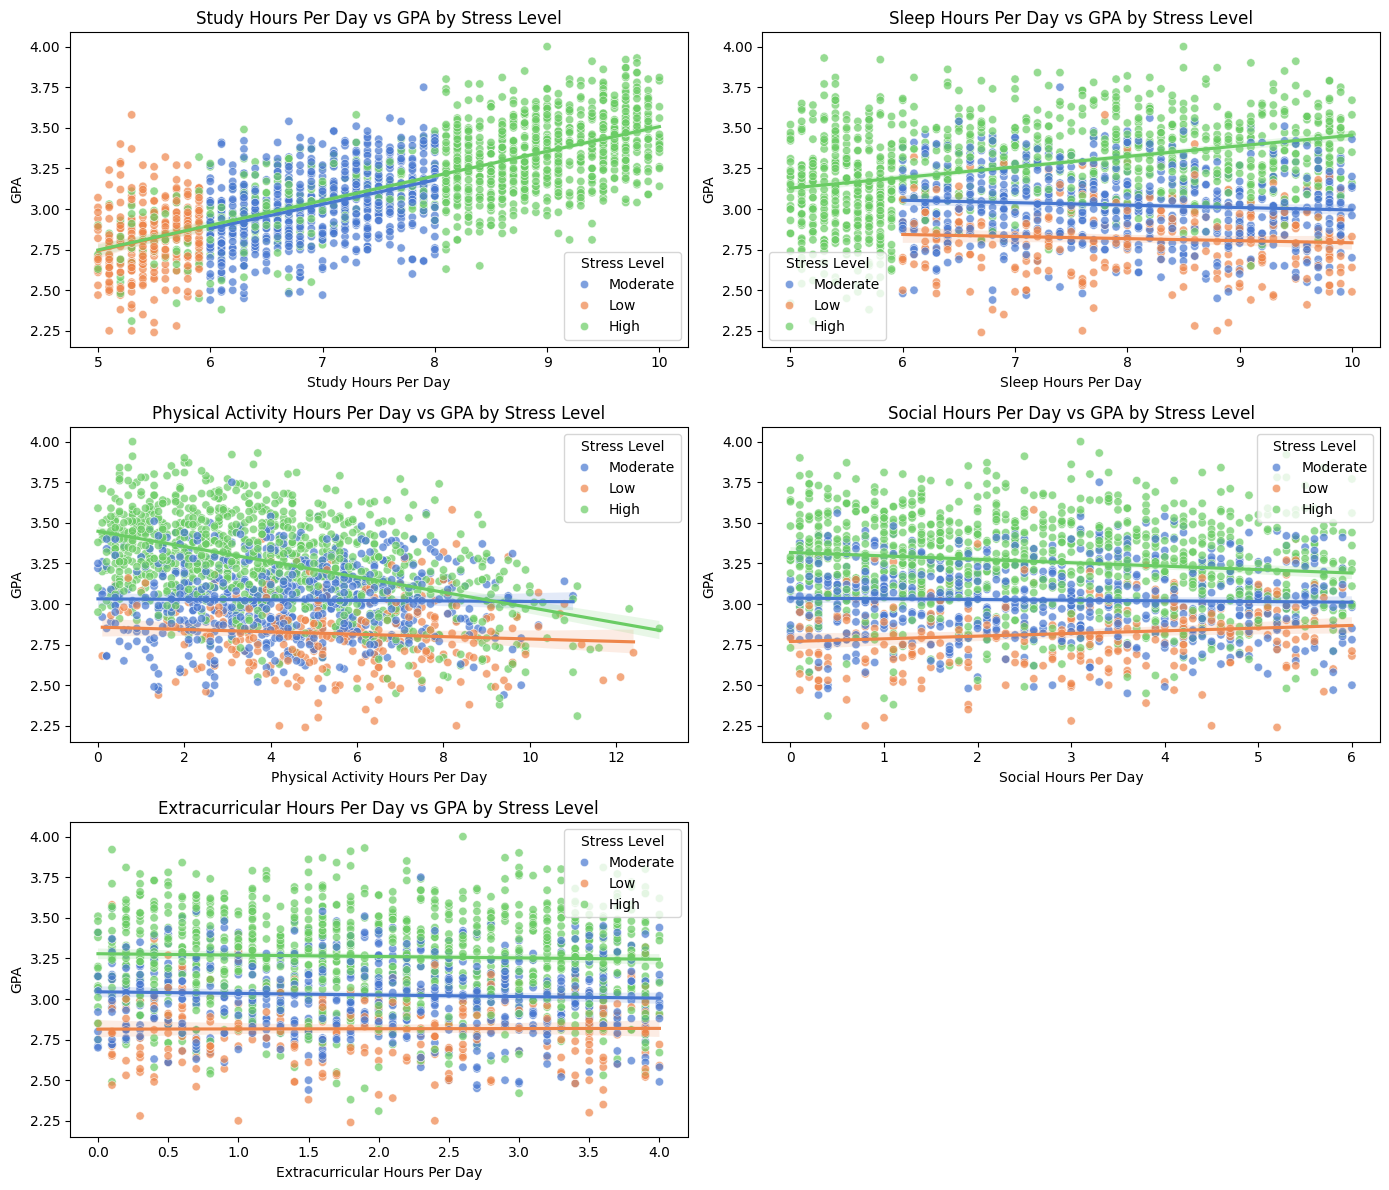

In [26]:
plt.figure(figsize=(14, 12))

numerical_features = [
    'Study_Hours_Per_Day', 
    'Sleep_Hours_Per_Day', 
    'Physical_Activity_Hours_Per_Day', 
    'Social_Hours_Per_Day', 
    'Extracurricular_Hours_Per_Day'
]

stress_colors = sns.color_palette('muted')

# Plot each feature
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(
        x=feature,
        y='GPA',
        hue='Stress_Level',
        data=df,
        palette=stress_colors,
        alpha=0.7
    )
    # Add linear regression lines for each stress level with matching colors
    for j, stress_level in enumerate(df['Stress_Level'].unique()):
        sns.regplot(
            x=feature,
            y='GPA',
            data=df[df['Stress_Level'] == stress_level],
            scatter=False,
            color=stress_colors[j],
            line_kws={'label': stress_level}
        )
    plt.title(f'{feature.replace("_", " ")} vs GPA by Stress Level')
    plt.xlabel(feature.replace('_', ' '))
    plt.ylabel('GPA')
    plt.legend(title='Stress Level')

plt.tight_layout()
plt.show()

#### Observaciones

1. **Study Hours**
- Fuerte correlación positiva con el GPA, especialmente para estudiantes bajo estrés alto y moderado.
2. **Physical Activity**
- Los altos niveles de actividad pueden reducir levemente el GPA de los estudiantes con mucho estrés.
3. **Sleep, Social, and Extracurricular Hours**
- Impacto mínimo en el GPA en todos los niveles de estrés, lo que resalta su papel indirecto en los resultados académicos.
4. **Stress Levels**
- El estrés alto intensifica la relación entre las horas de estudio y el GPA, mientras que el estrés bajo la debilita.

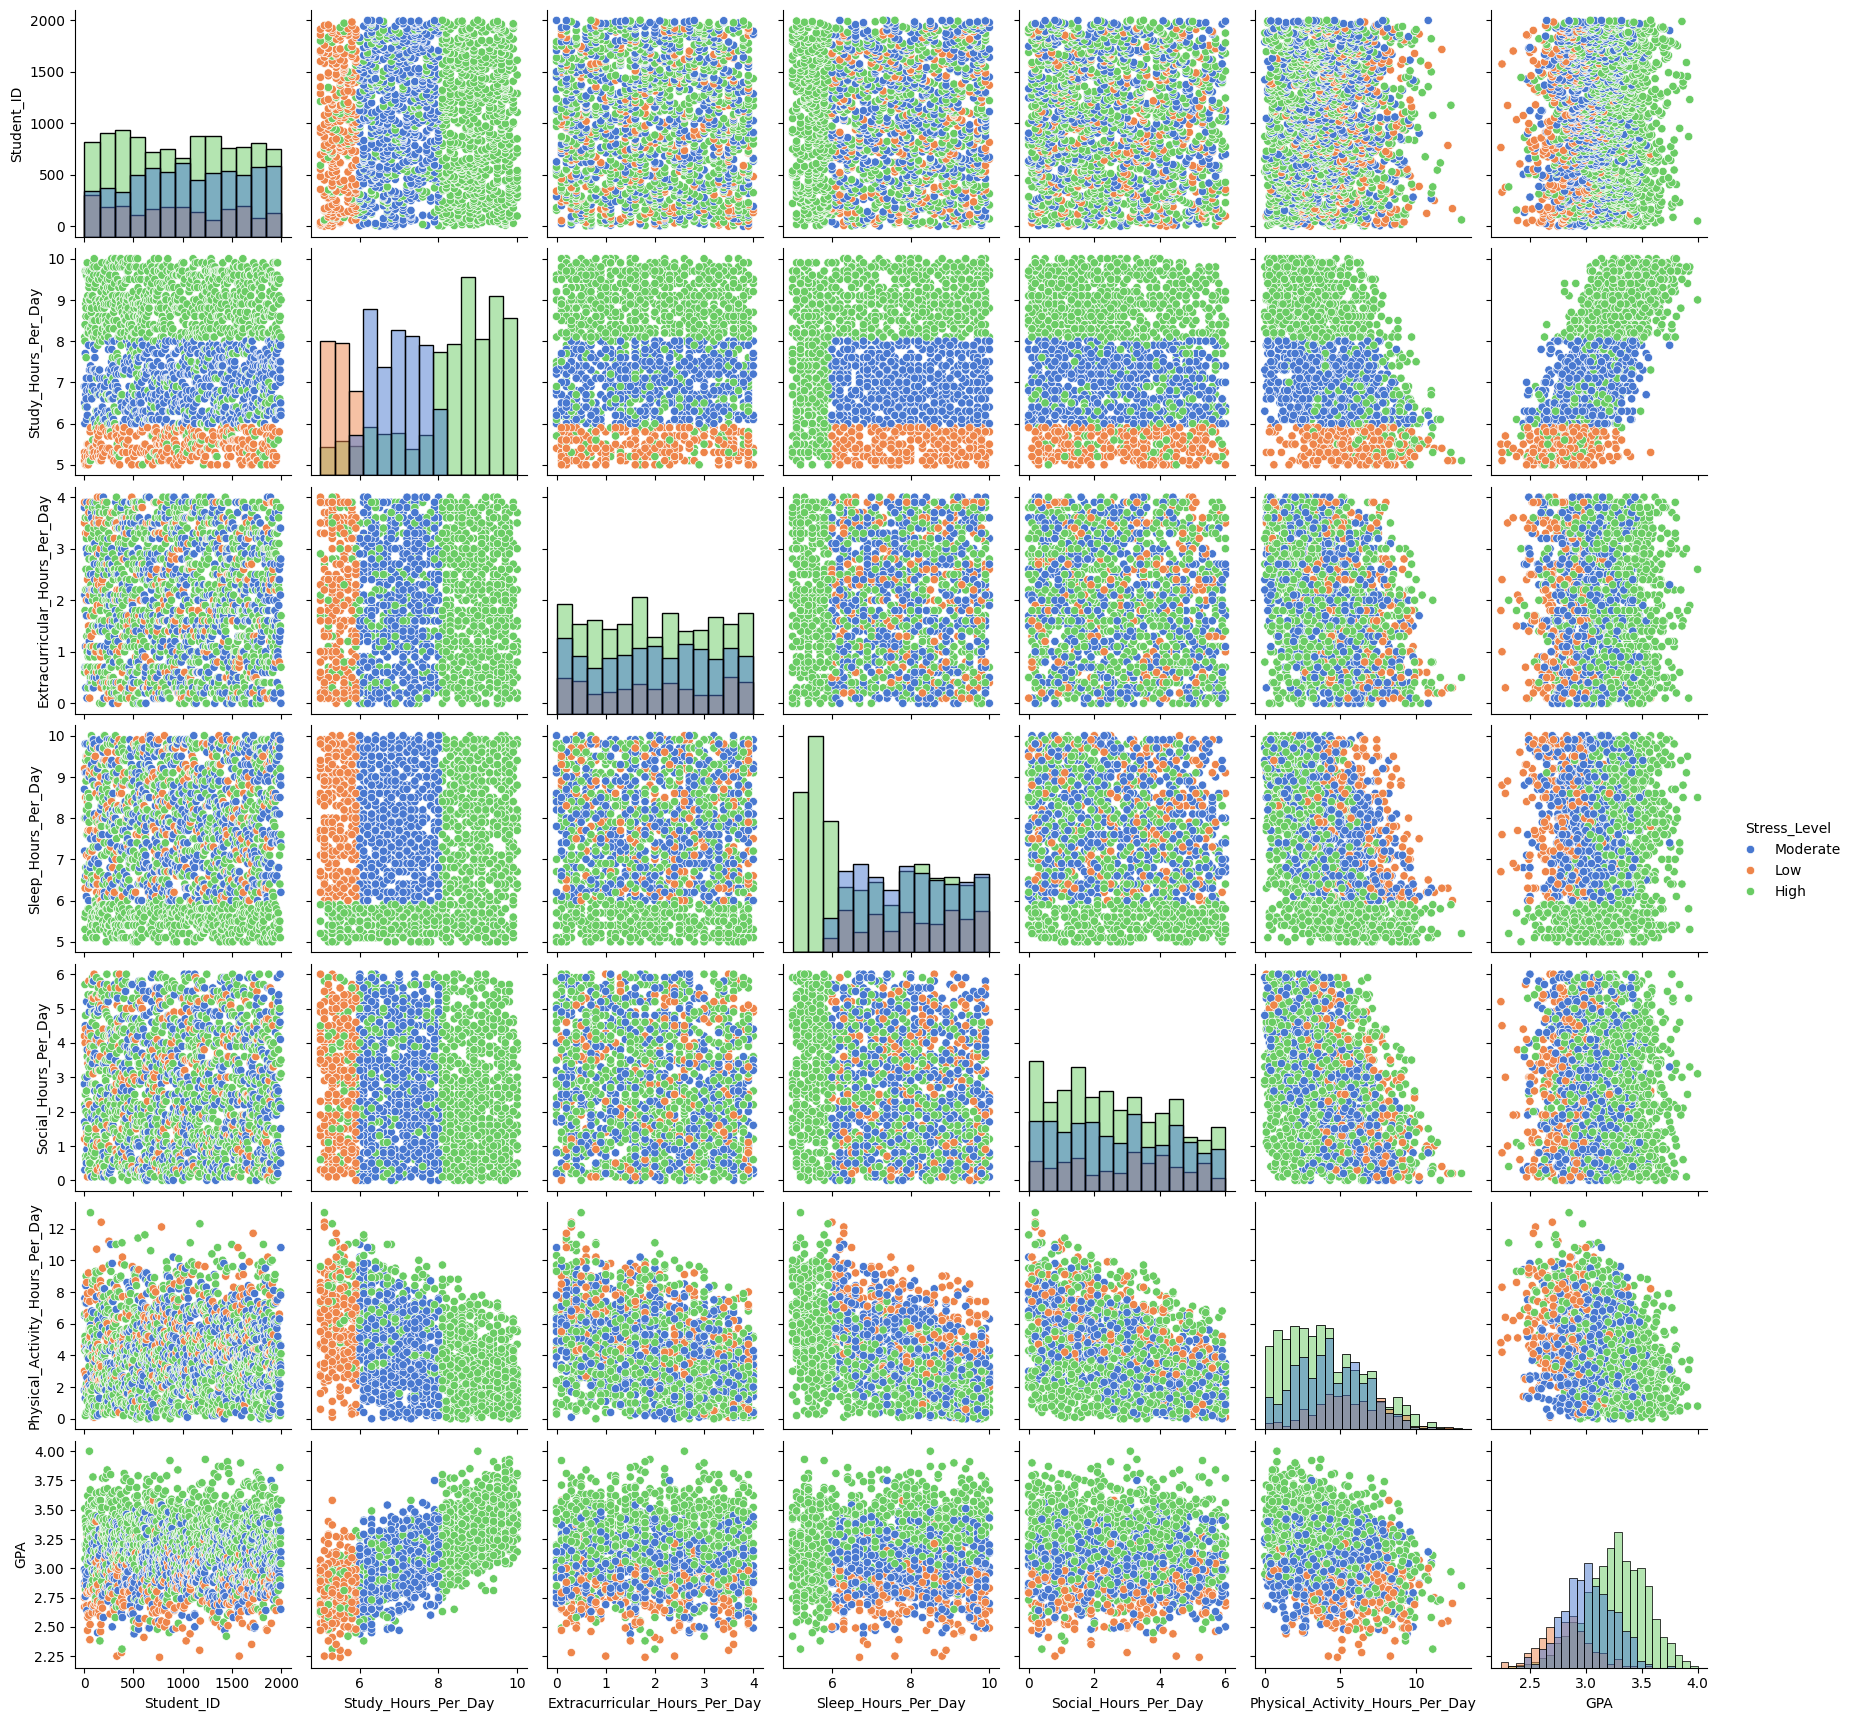

In [27]:
sns.pairplot(df, hue='Stress_Level', diag_kind='hist', palette='muted')

### Observaciones

1. **Estrés alto**
- El alto nivel de estrés se asocia con más horas de estudio y promedios de calificaciones más altos.
- La actividad física tiende a disminuir significativamente para estos estudiantes.
2. **Estrés moderado**
- Se evidencia un equilibrio entre las horas de estudio, el GPA y la actividad física.
- Este grupo mantiene un rango de GPA moderado.
3. **Estrés bajo**
- Los estudiantes de este grupo estudian menos, participan más en actividades físicas y tienden a tener promedios de calificaciones más bajos.

**Otras observaciones**
- Los estudiantes con alto nivel de estrés se concentran en gran medida en el estudio, lo que conduce a mejores promedios de calificaciones, pero a una menor actividad física.
- Los estudiantes con estrés moderado logran equilibrar lo académico y la actividad física, obteniendo promedios decentes.
- Los estudiantes con bajo nivel de estrés priorizan la actividad física sobre el estudio, lo que se correlaciona con un menor rendimiento académico.

## Preprocesamiento de datos

In [28]:
def categorize_academic_performance(gpa):
    if gpa >= 3.5:
        return 'Excellent'
    elif 3.0 <= gpa < 3.5:  
        return 'Good'
    elif 2.0 <= gpa < 3.0:  
        return 'Fair'
    else:
        return 'Poor'

df['Academic_Performance'] = df['GPA'].apply(categorize_academic_performance)
academic_performance_counts = df['Academic_Performance'].value_counts()

La categorizacioón del rendimiento académico de los estudiantes nos muestra la siguiente distribución:

- Bueno ($3.0 - 3.49$): $1067$ estudiantes
- Regular ($2.0 - 2.99$): $712$ estudiantes
- Excelente ($3.5 - 4.0$): $221$ estudiantes
- Malo ($< 2.0$): $0$ estudiantes

In [29]:
# Mapping for Stress_Level (ordinal encoding)
mapping_stress = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Stress_Level_Encoded'] = df['Stress_Level'].map(mapping_stress)

# Mapping for Academic_Performance (ordinal encoding)
mapping_performance = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
df['Academic_Performance_Encoded'] = df['Academic_Performance'].map(mapping_performance)

# Display the first few rows of the dataset to verify the new columns
df[['Stress_Level', 'Stress_Level_Encoded', 'Academic_Performance', 'Academic_Performance_Encoded']].head(10)

# Drop the original categorical columns
df = df.drop(columns=['Stress_Level', 'Academic_Performance'])
df.head()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA  Stress_Level_Encoded  Academic_Performance_Encoded  
0  2.99                     1                             1  
1  2.75                     0                             1  
2  2.67                     0                             1  
3  2.88                     1                             1  
4  3.51                     2                             3

In [30]:
# Creating a table for correlation of the target variable 'Stress_Level_Encoded' with other features
target_variable = 'Stress_Level_Encoded'
target_correlation_table = df.corr()[[target_variable]].sort_values(by=target_variable, ascending=False)

# Displaying the table
target_correlation_table

Stress_Level_Encoded
Stress_Level_Encoded                         1.000000
Study_Hours_Per_Day                          0.738843
GPA                                          0.550395
Academic_Performance_Encoded                 0.504442
Student_ID                                   0.003306
Extracurricular_Hours_Per_Day               -0.006099
Social_Hours_Per_Day                        -0.054702
Physical_Activity_Hours_Per_Day             -0.205207
Sleep_Hours_Per_Day                         -0.298917

### Observaciones

1. **Correlación positiva**
- Study_Hours_Per_Day ($0.738843$): La correlación positiva más fuerte indica que los estudiantes con niveles de estrés más altos tienden a pasar significativamente más tiempo estudiando.
- GPA ($0.550395$): Una correlación positiva moderada, que sugiere que los niveles más altos de estrés están asociados con un mayor rendimiento académico.
- Academic_Performance_Encoded ($0.504442$): La correlación positiva muestra que los estudiantes con niveles de estrés más altos a menudo caen en categorías de rendimiento académico más alto (_bueno_, _excelente_).
2. **Correlación negativa**
- Sleep_Hours_Per_Day ($-0.298917$): Una correlación negativa moderada, que indica que los niveles más elevados de estrés están relacionados con una menor duración del sueño.
- Physical_Activity_Hours_Per_Day ($-0.205207$): La correlación negativa sugiere que los estudiantes con mayores niveles de estrés realizan menos actividad física.
- Social_Hours_Per_Day ($-0.054702$): Una correlación negativa débil implica una ligera tendencia de los estudiantes con alto nivel de estrés a pasar menos tiempo socializando.
- Extracurricular_Hours_Per_Day ($-0.006099$): Correlación negativa muy débil, que muestra un impacto mínimo de las actividades extracurriculares en los niveles de estrés.

In [31]:
X = df.drop(columns=['Student_ID', 'Stress_Level_Encoded'])  
Y = df['Stress_Level_Encoded']  

iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_predictions = iso_forest.fit_predict(X)

# Identify outliers: Isolation Forest marks outliers as -1
outlier_indices = X.index[outlier_predictions == -1]

X_filtered = X.drop(outlier_indices, axis=0).reset_index(drop=True)
Y_filtered = Y.drop(outlier_indices, axis=0).reset_index(drop=True)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, Y_filtered, test_size=0.2, random_state=42)

# Apply RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

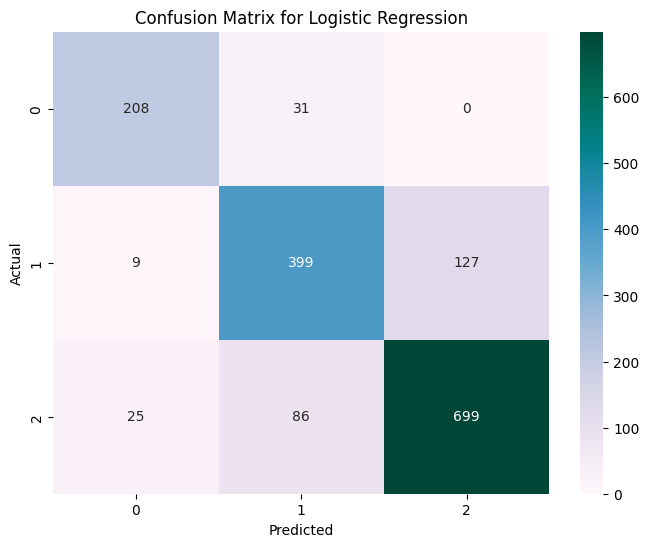


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       239
           1       0.77      0.75      0.76       535
           2       0.85      0.86      0.85       810

    accuracy                           0.82      1584
   macro avg       0.83      0.83      0.83      1584
weighted avg       0.82      0.82      0.82      1584



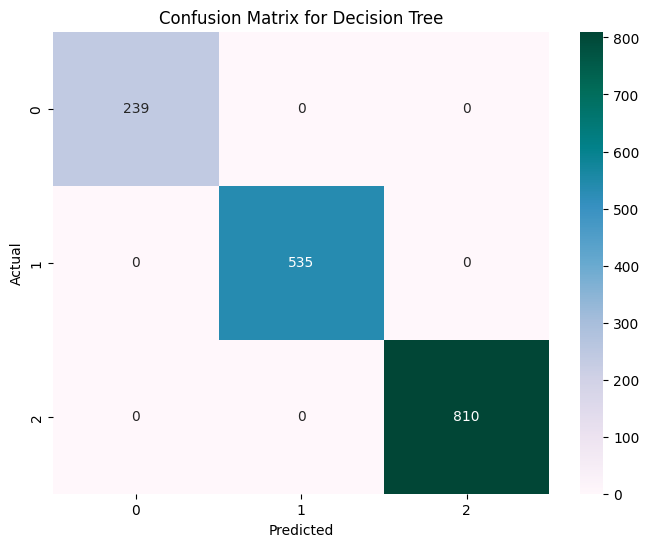


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       535
           2       1.00      1.00      1.00       810

    accuracy                           1.00      1584
   macro avg       1.00      1.00      1.00      1584
weighted avg       1.00      1.00      1.00      1584



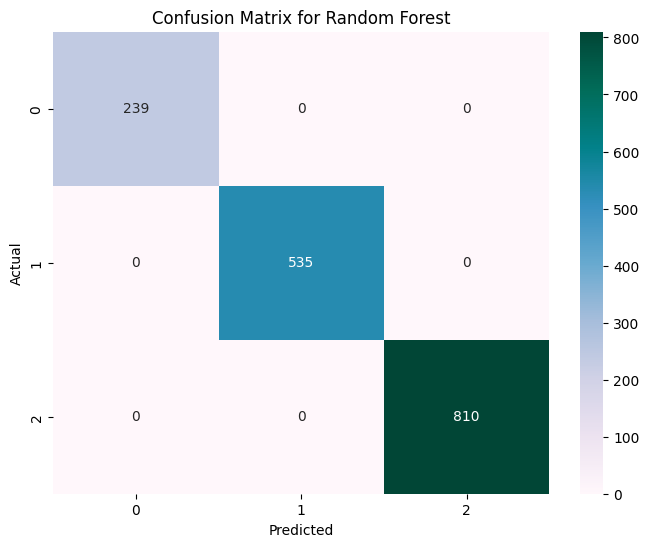


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       535
           2       1.00      1.00      1.00       810

    accuracy                           1.00      1584
   macro avg       1.00      1.00      1.00      1584
weighted avg       1.00      1.00      1.00      1584


Model Evaluation Summary:



Accuracy       AUC
Logistic Regression  0.824495  0.947523
Decision Tree        1.000000  1.000000
Random Forest        1.000000  1.000000

In [32]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

def train_and_evaluate_models(models, X_train, Y_train, X_test, Y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, Y_train)
        preds = model.predict(X_test)

        # Calculate metrics on the training data
        accuracy = accuracy_score(Y_train, model.predict(X_train))
        auc = (
            roc_auc_score(Y_train, model.predict_proba(X_train), multi_class="ovr") 
            if hasattr(model, 'predict_proba') else 'N/A'
        )

        results[name] = {
            'Accuracy': accuracy,
            'AUC': auc,
            'Predictions': preds
        }

        # Display confusion matrix for training data
        conf_matrix = confusion_matrix(Y_train, model.predict(X_train))
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBuGn',
                    xticklabels=model.classes_, yticklabels=model.classes_)
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Display classification report for training data
        print(f"\nClassification Report for {name}:\n")
        print(classification_report(Y_train, model.predict(X_train)))

    results_df = pd.DataFrame({
        name: {"Accuracy": results[name]["Accuracy"], "AUC": results[name]["AUC"]}
        for name in results
    }).T

    print("\nModel Evaluation Summary:\n")
    return results_df

evaluation_summary = train_and_evaluate_models(models, X_train, Y_train, X_test, Y_test)
evaluation_summary

### Observaciones

1. **Logistic Regression**: Alcanza una precisión del 83 % y un AUC de 0,95, lo que demuestra un buen rendimiento y es más interpretable. Es probable que tenga un rendimiento ligeramente inferior al de los modelos basados en árboles porque supone relaciones lineales.
2. **Decision Tree**: Alcanza un 100% de precisión y AUC, lo que indica que se ajusta perfectamente a los datos de entrenamiento.
3. **Random Forest**: También logra un 100 % de precisión y AUC, con un mejor potencial de generalización en comparación con un solo árbol de decisiones debido al aprendizaje conjunto.

In [33]:
# Define the base models for stacking
base_models = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]

# Define the meta-model for stacking
meta_model = RandomForestClassifier(random_state=42)

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

cv_scores = cross_val_score(stacking_model, X_train, Y_train, cv=5, scoring='accuracy')

stacking_model.fit(X_train, Y_train)

test_accuracy = stacking_model.score(X_test, Y_test)

# Display the cross-validation scores and test accuracy
{
    "Cross-Validation Scores": cv_scores.tolist(),
    "Mean CV Accuracy": cv_scores.mean(),
    "Test Set Accuracy": test_accuracy
}

{'Cross-Validation Scores': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Mean CV Accuracy': np.float64(1.0),
 'Test Set Accuracy': 1.0}

### Observaciones

- El modelo logró una precisión perfecta durante la validación cruzada y en el conjunto de prueba.
- Esto sugiere que el modelo combina eficazmente las fortalezas de los modelos base (Logistic Regression, Decision Tree, Random Forest) con el metamodelo (Random Forest).

## Predicción sobre los factores que impulsan el estrés

/tmp/ipykernel_28729/3652731881.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')


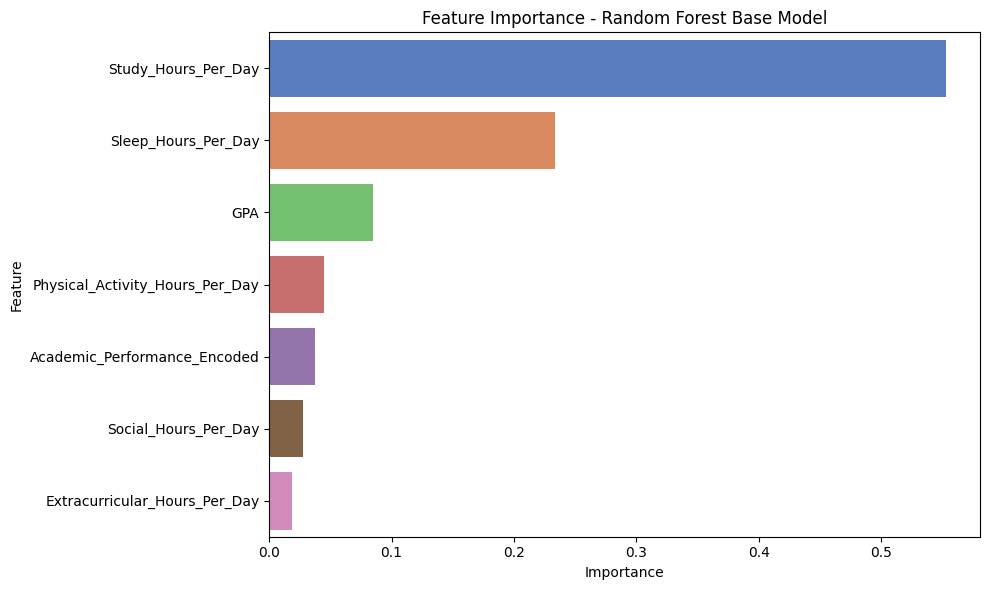

In [34]:
feature_names = X.columns

# Extract feature importance from the Random Forest base model
rf_base_model = stacking_model.named_estimators_['rf'] 
rf_feature_importances = rf_base_model.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')
plt.title('Feature Importance - Random Forest Base Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Observaciones

1. **Study_Hours_Per_Day**: Esta es la característica más importante y contribuye significativamente al modelo. Indica que los niveles de estrés están fuertemente correlacionados con la cantidad de horas que un estudiante pasa estudiando. Un mayor número de horas de estudio podría estar asociado con niveles más altos de estrés.
2. **Sleep_Hours_Per_Day**: La segunda característica más influyente. Destaca la relación negativa entre los niveles de estrés y las horas de sueño, los estudiantes que duermen menos tienden a reportar un mayor nivel de estrés.
3. **GPA**: El rendimiento académico juega un papel importante. Los estudiantes con promedios académicos más altos probablemente experimenten diferentes patrones de estrés, posiblemente debido a presiones académicas.
4. **Physical_Activity_Hours_Per_Day**: Esta característica tiene un impacto moderado. Sugiere que los estudiantes que realizan actividades físicas experimentan niveles de estrés más bajos, ya que se sabe que la actividad física alivia el estrés.
5. **Academic_Performance_Encoded**: Las categorías de rendimiento académico (por ejemplo, Excelente, Bueno) también contribuyen a los niveles de estrés, pero en menor medida en comparación con el GPA.
6. **Social_Hours_Per_Day** y **Extracurricular_Hours_Per_Day**: Estas características son las que tienen menor importancia. Indica que la socialización y las actividades extracurriculares tienen un impacto directo mínimo en los niveles de estrés, posiblemente debido a que se dedican menos tiempo a ellas en comparación con el estudio y el sueño.

/tmp/ipykernel_28729/3205587268.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_pred_mapped, palette='muted')


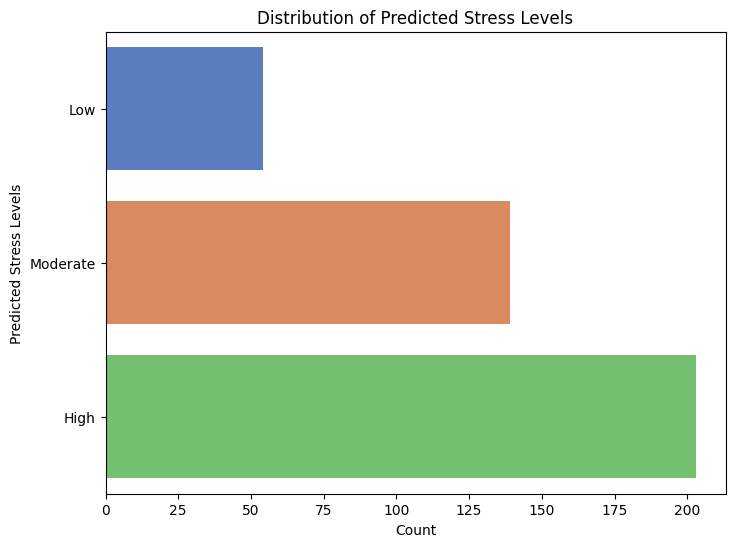

In [35]:
# Generate predictions on the test set using the stacking model
y_pred = stacking_model.predict(X_test)

# Map the encoded predictions back to the original stress level categories
mapping_stress_reverse = {0: 'Low', 1: 'Moderate', 2: 'High'}
y_pred_mapped = pd.Series(y_pred).map(mapping_stress_reverse)

# Plot the distribution of predicted stress levels
plt.figure(figsize=(8, 6))
sns.countplot(y=y_pred_mapped, palette='muted')
plt.title('Distribution of Predicted Stress Levels')
plt.xlabel('Count')
plt.ylabel('Predicted Stress Levels')
plt.show()

### Resultados de las predicciones:

1. **Estrés alto**: Se prevé que la mayoría de los estudiantes del grupo de prueba tengan niveles altos de estrés. Indica que muchos estudiantes enfrentan presiones académicas o relacionadas con el estilo de vida significativas.
2. **Estrés moderado**: Una cantidad considerable de estudiantes se encuentra en la categoría de estrés moderado.
Sugiere un estilo de vida equilibrado, en el que el estrés está presente pero no es abrumador.
3. **Estrés bajo**: Se prevé que una cantidad relativamente pequeña de estudiantes tenga niveles bajos de estrés. Refleja que pocos estudiantes mantienen un estilo de vida con poco estrés, lo que podría indicar una gestión eficaz del tiempo o entornos menos exigentes. 

## Conclusiones

El análisis de la relación entre el estilo de vida y el desempeño académico ha revelado hallazgos clave sobre los factores que influyen en el estrés y el rendimiento de los estudiantes.

- El estrés como factor predominante: El estrés tiene una fuerte correlación con las horas de estudio y un impacto moderado en la actividad física, lo que indica que los estudiantes bajo mayor presión académica tienden a priorizar el estudio sobre el ejercicio y el descanso.
- Horas de estudio y rendimiento académico: Los estudiantes con altos niveles de estrés suelen estudiar más y, en consecuencia, obtienen mejores promedios académicos. Sin embargo, esto puede generar una disminución en el bienestar general.
- Impacto de la actividad física y la socialización: Los estudiantes que dedican más tiempo al ejercicio pueden sacrificar horas de estudio. Sin embargo, la actividad física contribuye a la reducción del estrés, por lo que es recomendable encontrar un equilibrio entre el ejercicio y las exigencias académicas. Las horas de socialización no presentan un impacto significativo en el GPA, lo que indica que la vida social de los estudiantes no influye directamente en su desempeño académico.
- Importancia del sueño: No se encontró una correlación significativa entre las horas de sueño y el GPA, lo que sugiere que la cantidad de descanso no afecta directamente el rendimiento académico. Sin embargo, una menor cantidad de horas de sueño se asocia con mayores niveles de estrés, lo que puede afectar la salud mental y el bienestar general de los estudiantes.
- Predicciones y tendencias generales: Se prevé que la mayoría de los estudiantes continúe experimentando niveles altos de estrés, lo que refuerza la necesidad de estrategias para el manejo del estrés en entornos académicos. Un grupo significativo se mantiene en niveles moderados de estrés, lo que indica un mejor equilibrio en su estilo de vida. Un número reducido de estudiantes presenta bajos niveles de estrés, lo que sugiere que solo una minoría ha encontrado formas efectivas de gestionar la presión académica y personal.

### Recomendaciones

Dado que el estrés y las horas de estudio son factores determinantes en el rendimiento académico, se recomienda:
- Implementar estrategias de gestión del tiempo para equilibrar estudio, descanso y recreación.
- Fomentar la actividad física como herramienta para reducir el estrés sin afectar significativamente el rendimiento académico.
- Promover la higiene del sueño, ya que, aunque el sueño no impacta directamente en el GPA, sí influye en el bienestar general y en la capacidad de concentración.
- Desarrollar programas de apoyo académico y emocional para ayudar a los estudiantes a enfrentar la presión académica sin comprometer su salud mental.